In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


1.Input Data

In [2]:
df = pd.read_csv('../Data/my_file.csv')

In [3]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


2.get Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


3.Encode categorical and text variables


In [5]:
df.columns = df.columns.str.replace('\u00A0', ' ')

In [6]:
df['Actual gross']

0        $780,000,000
1        $579,800,000
2        $411,000,000
3        $397,300,000
4        $345,675,146
5        $305,158,363
6        $280,000,000
7        $257,600,000
8        $256,084,556
9        $250,400,000
10    $229,100,000[b]
11       $227,400,000
12       $204,000,000
13       $200,000,000
14       $194,000,000
15       $184,000,000
16       $170,000,000
17       $169,800,000
18    $167,700,000[e]
19       $150,000,000
Name: Actual gross, dtype: object

In [7]:
df['Actual gross'] = df['Actual gross'].str.replace(r'[^0-9]', '', regex=True)

In [8]:
df['Actual gross']

0     780000000
1     579800000
2     411000000
3     397300000
4     345675146
5     305158363
6     280000000
7     257600000
8     256084556
9     250400000
10    229100000
11    227400000
12    204000000
13    200000000
14    194000000
15    184000000
16    170000000
17    169800000
18    167700000
19    150000000
Name: Actual gross, dtype: object

In [9]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,"$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],579800000,"$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],411000000,"$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],397300000,"$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,345675146,"$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],305158363,"$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,280000000,"$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,257600000,"$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,256084556,"$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,250400000,"$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


In [10]:
df['Adjusted gross (in 2022 dollars)'] = df['Adjusted gross (in 2022 dollars)'].str.replace(r'[^0-9]', '', regex=True)

In [11]:
df['Adjusted gross (in 2022 dollars)']

0     780000000
1     579800000
2     560622615
3     454751555
4     402844849
5     388978496
6     381932682
7     257600000
8     312258401
9     309141878
10    283202896
11    295301479
12    251856802
13    299676265
14    281617035
15    227452347
16    213568571
17    207046755
18    204486106
19    185423109
Name: Adjusted gross (in 2022 dollars), dtype: object

In [12]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


In [13]:
df['Average gross'] = df['Average gross'].str.replace(r'[^0-9]', '', regex=True)

In [14]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour †,2023–2024,56,13928571,[1]
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3]
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294,[6]
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7]
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8]
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9]
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11]
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival †,2023–2024,41,6282927,[12]
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13]
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The 1989 World Tour,2015,85,2945882,[14]


In [15]:
df['Tour title'] = df['Tour title'].str.replace(r'‡.*$', '', regex=True)


In [16]:
df['Tour title'] = df['Tour title'].str.replace(r"[^a-zA-Z]" , " ",regex=True)

In [17]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,[1]
1,2,1,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3]
2,3,1[4],2[5],411000000,560622615,Madonna,Sticky Sweet Tour,2008–2009,85,4835294,[6]
3,4,2[7],10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7]
4,5,2[4],NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8]
5,6,2[4],10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9]
6,7,2[10],NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11]
7,7,NaN,NaN,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,[12]
8,9,NaN,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13]
9,10,NaN,NaN,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,[14]


In [18]:
df['Peak'] = pd.Series(range(1, len(df) + 1), index=df.index)

In [19]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,[1]
1,2,2,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3]
2,3,3,2[5],411000000,560622615,Madonna,Sticky Sweet Tour,2008–2009,85,4835294,[6]
3,4,4,10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7]
4,5,5,NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8]
5,6,6,10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9]
6,7,7,NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11]
7,7,8,NaN,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,[12]
8,9,9,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13]
9,10,10,NaN,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,[14]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              20 non-null     int64 
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(3), object(8)
memory usage: 1.8+ KB


4.Correct data types



In [21]:
df['Average gross'] = df['Average gross'].apply(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              20 non-null     int64 
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(3), object(8)
memory usage: 1.8+ KB


In [23]:
df['Actual gross'] = df['Actual gross'].sort_values(ascending=True)

In [24]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,[1]
1,2,2,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3]
2,3,3,2[5],411000000,560622615,Madonna,Sticky Sweet Tour,2008–2009,85,4835294,[6]
3,4,4,10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7]
4,5,5,NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8]
5,6,6,10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9]
6,7,7,NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11]
7,7,8,NaN,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,[12]
8,9,9,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13]
9,10,10,NaN,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,[14]


In [25]:
df.drop('All Time Peak',axis=1)

,Rank,Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,[1]
1,2,2,579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3]
2,3,3,411000000,560622615,Madonna,Sticky Sweet Tour,2008–2009,85,4835294,[6]
3,4,4,397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7]
4,5,5,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8]
5,6,6,305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9]
6,7,7,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11]
7,7,8,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,[12]
8,9,9,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13]
9,10,10,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,[14]


In [26]:
df['Actual gross']=df['Actual gross'].astype(int)
df['Adjusted gross (in 2022 dollars)']=df['Adjusted gross (in 2022 dollars)'].astype(int)

In [27]:
df.describe()

,Rank,Peak,Actual gross,Adjusted gross (in 2022 dollars),Shows
count,20.000000,20.00000,2.000000e+01,2.000000e+01,20.000000
mean,10.450000,10.50000,2.879509e+08,3.438781e+08,110.000000
std,5.942488,5.91608,1.563284e+08,1.514627e+08,66.507617
min,1.000000,1.00000,1.500000e+08,1.854231e+08,41.000000
25%,5.750000,5.75000,1.915000e+08,2.457557e+08,59.000000
50%,10.500000,10.50000,2.397500e+08,2.974889e+08,87.000000
75%,15.250000,15.25000,3.152876e+08,3.924451e+08,134.500000
max,20.000000,20.00000,7.800000e+08,7.800000e+08,325.000000


5.plot(Data visualization)

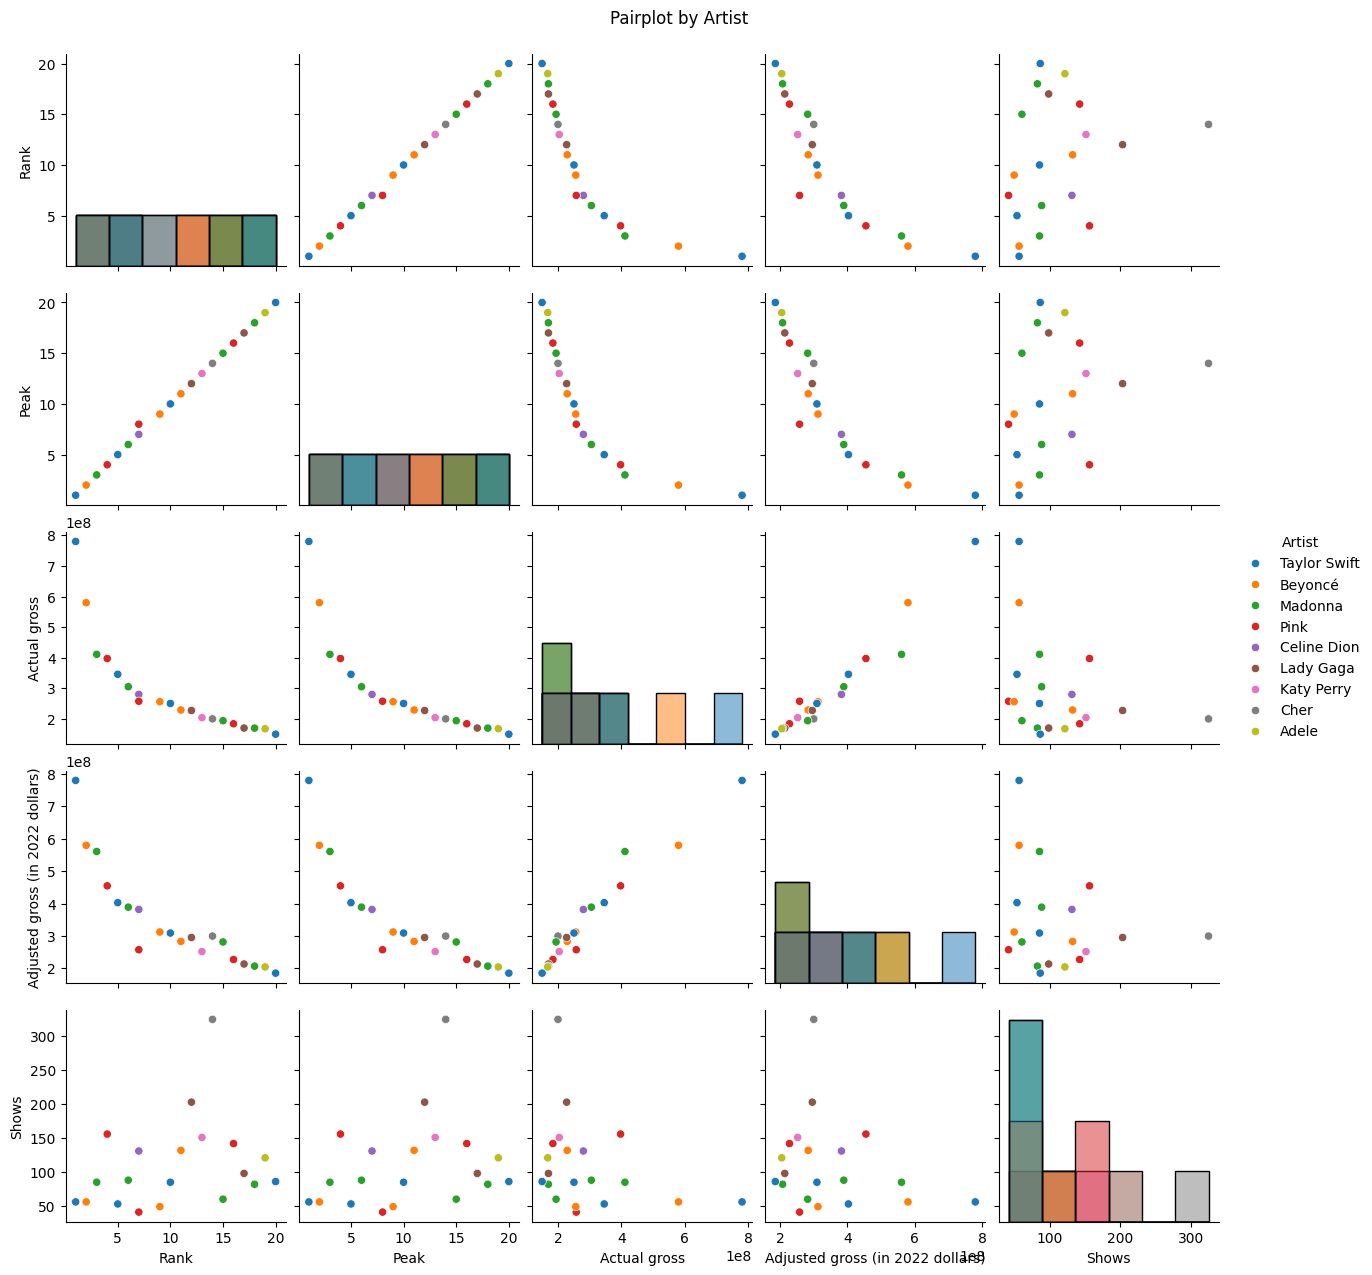

In [28]:
sns.pairplot(df, hue='Artist', diag_kind='hist')
plt.suptitle('Pairplot by Artist', y=1.02)
plt.show()

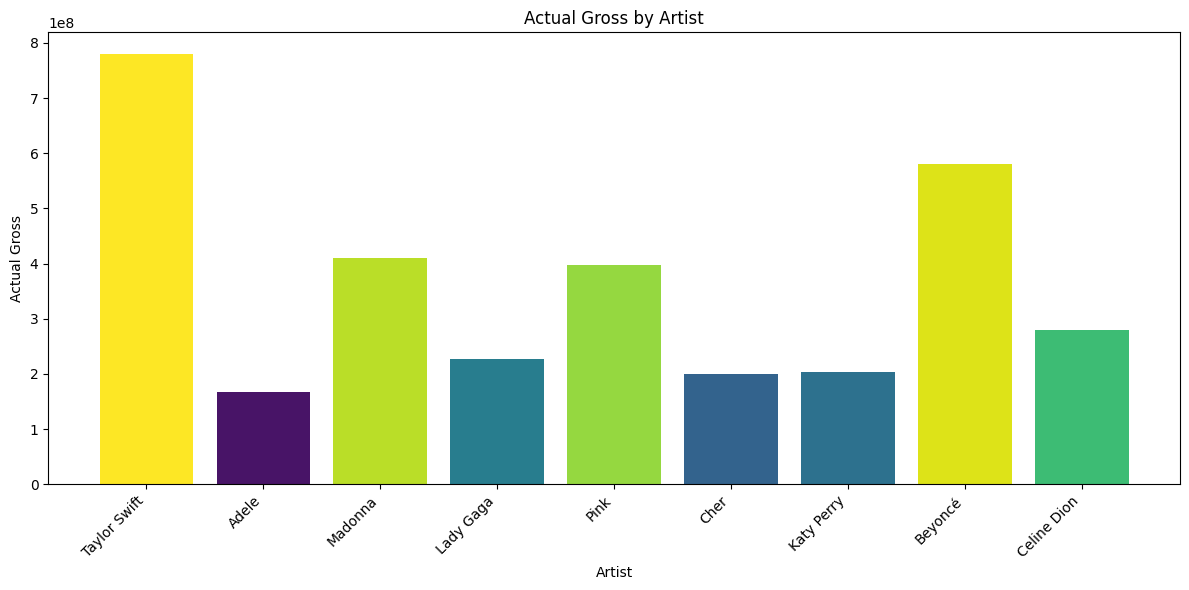

In [29]:
df_sorted = df.sort_values('Actual gross', ascending=True)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))
plt.bar(df_sorted['Artist'], df_sorted['Actual gross'], color=colors)
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Artist')
plt.ylabel('Actual Gross')
plt.title('Actual Gross by Artist')
plt.tight_layout()
plt.show()

In [30]:
count_of_artist=df['Artist'].value_counts()

In [31]:
count_of_artist

Artist
Taylor Swift    4
Madonna         4
Beyoncé         3
Pink            3
Lady Gaga       2
Celine Dion     1
Katy Perry      1
Cher            1
Adele           1
Name: count, dtype: int64

In [32]:
df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,780000000,780000000,Taylor Swift,The Eras Tour,2023–2024,56,13928571,[1]
1,2,2,7[2],579800000,579800000,Beyoncé,Renaissance World Tour,2023,56,10353571,[3]
2,3,3,2[5],411000000,560622615,Madonna,Sticky Sweet Tour,2008–2009,85,4835294,[6]
3,4,4,10[7],397300000,454751555,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795,[7]
4,5,5,NaN,345675146,402844849,Taylor Swift,Reputation Stadium Tour,2018,53,6522173,[8]
5,6,6,10[9],305158363,388978496,Madonna,The MDNA Tour,2012,88,3467709,[9]
6,7,7,NaN,280000000,381932682,Celine Dion,Taking Chances World Tour,2008–2009,131,2137405,[11]
7,7,8,NaN,257600000,257600000,Pink,Summer Carnival,2023–2024,41,6282927,[12]
8,9,9,NaN,256084556,312258401,Beyoncé,The Formation World Tour,2016,49,5226215,[13]
9,10,10,NaN,250400000,309141878,Taylor Swift,The World Tour,2015,85,2945882,[14]


In [36]:
df.to_csv('../Data/processed/clean_data.csv')

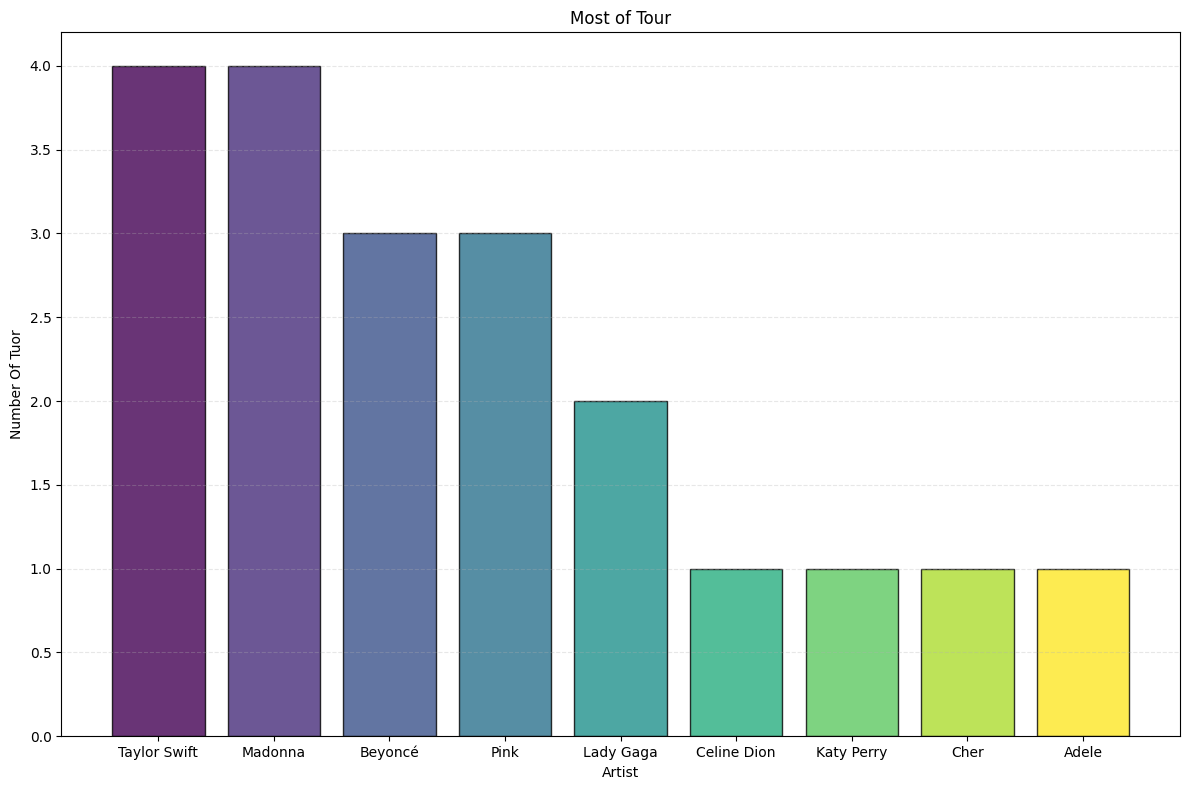

In [ ]:
artists = ['Taylor Swift', 'Madonna', 'Beyoncé', 'Pink', 'Lady Gaga', 'Celine Dion', 'Katy Perry', 'Cher', 'Adele']
tour_counts = [4, 4, 3, 3, 2, 1, 1, 1, 1]

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(artists)))

bars = plt.bar(artists, tour_counts, color=colors, edgecolor='black', alpha=0.8)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.xlabel('Artist')
plt.ylabel('Number Of Tuor')
plt.title('Most of Tour')
plt.tight_layout()
plt.show()